In [ ]:
from google.colab import files
uploaded = files.upload()
!unzip df.zip

Saving df.zip to df (1).zip
Archive:  df.zip
replace df.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: df.csv                  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('df.csv',parse_dates=True,index_col='date')
print(df)

            account_id  amount  balance
date                                   
1993-01-01        2378   700.0    700.0
1993-01-01         576   900.0    900.0
1993-01-01         704  1000.0   1000.0
1993-01-01        3818   600.0    600.0
1993-01-02        1972   400.0    400.0
...                ...     ...      ...
1998-12-31        2906    62.3  13729.4
1998-12-31        2935    81.3  19544.9
1998-12-31        2869    60.2  14638.2
1998-12-31        2907   107.5  23453.0
1998-12-31        2902   164.1  41642.9

[1056320 rows x 3 columns]


In [ ]:
df_comp = df.groupby(df.index.strftime('%Y-%m')).sum()['amount']
print(df_comp)

date
1993-01    7.021576e+05
1993-02    2.726925e+06
1993-03    4.730319e+06
1993-04    7.378368e+06
1993-05    1.168075e+07
               ...     
1998-08    1.506393e+08
1998-09    1.482977e+08
1998-10    1.518896e+08
1998-11    1.488421e+08
1998-12    1.716971e+08
Name: amount, Length: 72, dtype: float64


<h2>Part for Regression starts from here<h/2>

In [ ]:
def NormalizeData(X):
	mean = np.mean(X,axis=0,keepdims=True)
	sigma = np.std(X,axis=0,keepdims=True)
	X_norm = (X-mean)/sigma;
	return [X_norm,mean,sigma]

def sgd_momentum(w, dw, learning_rate=None,config=None):

    if config is None: config = {}
    # config.setdefault('learning_rate', 1e-1)
    config.setdefault('momentum', 0.9)
    v = config.get('velocity', np.zeros_like(w))
    if learning_rate==None:
    	learning_rate = 1e-2


    next_w = None
    v  = config['momentum']*v - learning_rate*dw
    next_w = w + v
    config['velocity'] = v
    return next_w, config

def computeCost(X,y,theta,reg=None):
	if(reg==None):
		reg = 0

	m = X.shape[0]
	J = np.sum((X.dot(theta) - y)**2)/(2*m)
	J += (reg*np.sum(theta**2))/(2*m)
	dtheta = ((X.T).dot(  X.dot(theta) - y  ))/m
	dtheta += reg*np.sum(theta)/m
	return [J,dtheta];

def gradientDescentWithMomentum(X,y,theta,num_iters,reg=None,learning_rate=None,printEpochs=None):
	m = X.shape[0]
	J_history = np.zeros((num_iters, 1))
	dtheta = ((X.T).dot(  X.dot(theta) - y  ))/m

	for i in range(num_iters):
		theta,config = sgd_momentum(theta, dtheta,learning_rate, config=None)
		[J_history[i],dtheta] = computeCost(X,y,theta,reg);
		if(printEpochs==True):
			print("Iteration ", i, " : ", J_history[i])
		if(i>1 and abs(J_history[i]-J_history[i-1])<1e-5):
			break

	return [theta,J_history]

In [ ]:
temp = np.arange(1,61).reshape(60,1)
X = temp
# X = np.hstack((temp,np.sqrt(temp)))
# X = np.hstack((X,temp**2))
# print(X.shape)

In [ ]:
y = np.array(df_comp.iloc[0:60])
# print(y)

In [ ]:
num_training  = X.shape[0]
try:
  num_features  = X.shape[1]
except:
  num_features = 1;
print("Number of training example :", num_training)
print("Number of Features :", num_features)

X = X.reshape((num_training,num_features))
y = y.reshape((num_training,1))
# [X,mean,sigma] = NormalizeData(X)

X = np.hstack( (np.ones((num_training,1)),X ))
theta = np.random.rand(num_features+1,1)
print("Initial value of theta is : \n",theta)

Number of training example : 60
Number of Features : 1
Initial value of theta is : 
 [[0.9326166 ]
 [0.73800327]]


In [ ]:
num_iters= 2500
reg = 0.5
learning_rate = 1e-3
[theta,J_history] = gradientDescentWithMomentum(X,y,theta,num_iters,reg,learning_rate,True);

Iteration  0  :  [2.81199445e+14]
Iteration  1  :  [1.00163309e+14]
Iteration  2  :  [9.05076984e+13]
Iteration  3  :  [8.99919581e+13]
Iteration  4  :  [8.99635888e+13]
Iteration  5  :  [8.99612235e+13]
Iteration  6  :  [8.99602426e+13]
Iteration  7  :  [8.99593367e+13]
Iteration  8  :  [8.9958435e+13]
Iteration  9  :  [8.9957534e+13]
Iteration  10  :  [8.99566335e+13]
Iteration  11  :  [8.99557334e+13]
Iteration  12  :  [8.99548338e+13]
Iteration  13  :  [8.99539346e+13]
Iteration  14  :  [8.99530359e+13]
Iteration  15  :  [8.99521377e+13]
Iteration  16  :  [8.99512399e+13]
Iteration  17  :  [8.99503426e+13]
Iteration  18  :  [8.99494457e+13]
Iteration  19  :  [8.99485493e+13]
Iteration  20  :  [8.99476533e+13]
Iteration  21  :  [8.99467578e+13]
Iteration  22  :  [8.99458628e+13]
Iteration  23  :  [8.99449682e+13]
Iteration  24  :  [8.9944074e+13]
Iteration  25  :  [8.99431804e+13]
Iteration  26  :  [8.99422871e+13]
Iteration  27  :  [8.99413944e+13]
Iteration  28  :  [8.9940502e+13]

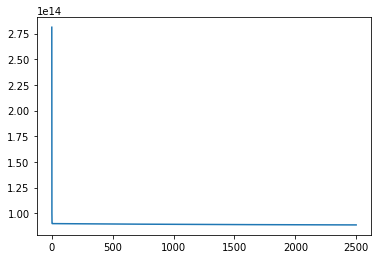

In [ ]:
plt.plot(J_history)


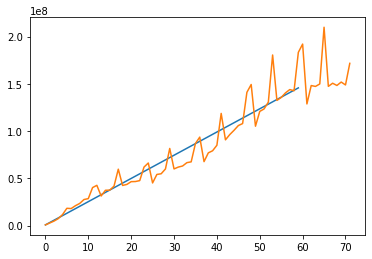

In [ ]:
pred = X.dot(theta)
plt.plot(pred)
plt.plot(np.array(df_comp))

In [ ]:
print(theta)

[[-1724070.71451244]
 [ 2457287.0761572 ]]


<h1>Regression Ends here </h1>

<h2>Part 1 : Identifying Seasonality through Ratio </h2>


Taking normal mean

In [ ]:
diff_mean = []
sum = 0;
# pred_l = pred_l.reshape((pred_l.shape[0],1))
temp = np.array(df_comp[0:60]).reshape((60,1))

for k in range(1,6):
  for i in range(12):
    for j in range(k):
      sum += df_comp[i + j*12]/pred[i + j*12]
    diff_mean.append(sum/k)
    sum = 0

print(diff_mean)
print(len(diff_mean))
# print(np.hstack((pred_l,temp)))

[array([0.95764039]), array([0.85470063]), array([0.83755206]), array([0.91033895]), array([1.10588431]), array([1.40494917]), array([1.16439658]), array([1.17255195]), array([1.14943416]), array([1.20666729]), array([1.12722844]), array([1.44840494]), array([1.18350749]), array([0.90598772]), array([0.95077478]), array([0.95382743]), array([1.07397006]), array([1.4044323]), array([1.0545111]), array([1.04562387]), array([1.04064341]), array([1.04867983]), array([0.99789205]), array([1.26483778]), array([1.15883518]), array([0.84595965]), array([0.91297493]), array([0.90841611]), array([1.00318805]), array([1.31415308]), array([0.97145747]), array([0.96542578]), array([0.95857222]), array([0.97040972]), array([0.93201703]), array([1.17720927]), array([1.13153386]), array([0.81905117]), array([0.88917811]), array([0.88628826]), array([0.96697919]), array([1.27805471]), array([0.94687856]), array([0.95032866]), array([0.95052583]), array([0.96552307]), array([0.93625419]), array([1.18624

Taking weighted Mean

In [ ]:
diff_mean_weighted = []
sum = 0;
# pred_l = pred_l.reshape((pred_l.shape[0],1))
temp = np.array(df_comp[0:60]).reshape((60,1))

for k in range(1,6):
  for i in range(12):
    mul = 1
    denom = 0;
    for j in range(k):
      denom += mul
      sum += mul*df_comp[i + j*12]/pred[i + j*12]
      mul -= 0.2

    diff_mean_weighted.append(sum/denom)
    sum = 0

print(diff_mean_weighted)
print(len(diff_mean_weighted))
# print(np.hstack((pred_l,temp)))

[array([0.95764039]), array([0.85470063]), array([0.83755206]), array([0.91033895]), array([1.10588431]), array([1.40494917]), array([1.16439658]), array([1.17255195]), array([1.14943416]), array([1.20666729]), array([1.12722844]), array([1.44840494]), array([1.15841115]), array([0.90028915]), array([0.93819448]), array([0.94899537]), array([1.07751609]), array([1.40448973]), array([1.0667206]), array([1.05972699]), array([1.05273127]), array([1.06623399]), array([1.01226276]), array([1.28523413]), array([1.146181]), array([0.85669274]), array([0.91298966]), array([0.9161449]), array([1.02354308]), array([1.33676596]), array([1.001378]), array([0.99605265]), array([0.98815591]), array([1.00314287]), array([0.95926381]), array([1.21441366]), array([1.13238798]), array([0.83978317]), array([0.89938938]), array([0.9023963]), array([0.99994444]), array([1.3129079]), array([0.98305855]), array([0.98305045]), array([0.97933174]), array([0.99567434]), array([0.95779265]), array([1.2142616]), 

Weighted mean with starting values with higher weightage

In [ ]:
diff_mean_weighted2 = []
sum = 0;
# pred_l = pred_l.reshape((pred_l.shape[0],1))
temp = np.array(df_comp[0:60]).reshape((60,1))

for k in range(1,6):
  for i in range(12):
    mul = 0.2
    denom = 0;
    for j in range(k):
      denom += mul
      sum += mul*df_comp[i + j*12]/pred[i + j*12]
      mul += 0.2

    diff_mean_weighted2.append(sum/denom)
    sum = 0

print(diff_mean_weighted2)
print(len(diff_mean_weighted2))
# print(np.hstack((pred_l,temp)))

[array([0.95764039]), array([0.85470063]), array([0.83755206]), array([0.91033895]), array([1.10588431]), array([1.40494917]), array([1.16439658]), array([1.17255195]), array([1.14943416]), array([1.20666729]), array([1.12722844]), array([1.44840494]), array([1.25879653]), array([0.92308341]), array([0.98851569]), array([0.96832359]), array([1.06333198]), array([1.40426]), array([1.01788261]), array([1.00331451]), array([1.00437983]), array([0.99601734]), array([0.95477992]), array([1.20364873]), array([1.18414354]), array([0.82449346]), array([0.91294545]), array([0.89295853]), array([0.962478]), array([1.26892733]), array([0.91161641]), array([0.90417206]), array([0.89940483]), array([0.90494342]), array([0.87752345]), array([1.10280048]), array([1.13033808]), array([0.79002638]), array([0.87488234]), array([0.863737]), array([0.92082785]), array([1.22926023]), array([0.89622658]), array([0.90451815]), array([0.91019757]), array([0.9233113]), array([0.90610034]), array([1.14701998]),

RMSE :  633394296.7564138


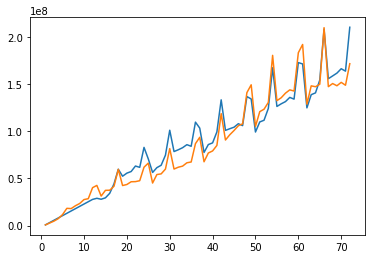

In [ ]:
temp = np.arange(1,73).reshape(72,1)
X_new = temp
# X_new = np.hstack((temp,np.sqrt(temp)))
# X_new = np.hstack((X_new,temp**2))
# [X_new,mean,sigma] = NormalizeData(X_new)
temp2 = np.hstack( (np.ones((72,1)),X_new ) )

pred_new = temp2.dot(theta).reshape(72,1)
# print(pred_new.shape)
for i in range(60):
  pred_new[12+i] = pred_new[12+i] * (diff_mean[i])

print("RMSE : ", np.sqrt( (np.sum((pred_new-np.array(df_comp))**2))/72) )

plt.plot(np.arange(1,73),pred_new)
plt.plot(np.arange(1,73),np.array(df_comp))
# print(np.array(df_comp))

RMSE :  641075214.0485791


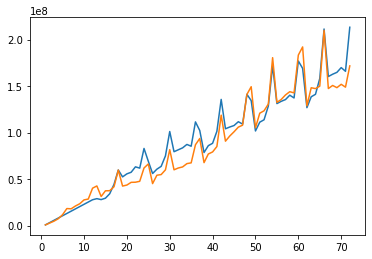

In [ ]:
temp = np.arange(1,73).reshape(72,1)
X_new = temp
# X_new = np.hstack((temp,np.sqrt(temp)))
# X_new = np.hstack((X_new,temp**2))
# [X_new,mean,sigma] = NormalizeData(X_new)
temp2 = np.hstack( (np.ones((72,1)),X_new ) )

pred_new = temp2.dot(theta).reshape(72,1)
# print(pred_new.shape)
for i in range(60):
  pred_new[12+i] = pred_new[12+i] * (diff_mean_weighted[i])

print("RMSE : ", np.sqrt( (np.sum((pred_new-np.array(df_comp))**2))/72) )

plt.plot(np.arange(1,73),pred_new)
plt.plot(np.arange(1,73),np.array(df_comp))
# print(np.array(df_comp))

RMSE :  624155290.6226814


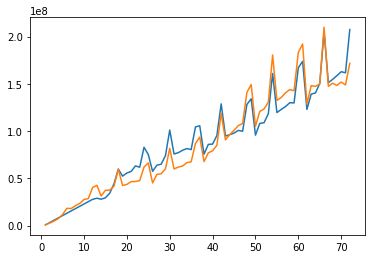

In [ ]:
temp = np.arange(1,73).reshape(72,1)
X_new = temp
# X_new = np.hstack((temp,np.sqrt(temp)))
# X_new = np.hstack((X_new,temp**2))
# [X_new,mean,sigma] = NormalizeData(X_new)
temp2 = np.hstack( (np.ones((72,1)),X_new ) )

pred_new = temp2.dot(theta).reshape(72,1)
# print(pred_new.shape)
for i in range(60):
  pred_new[12+i] = pred_new[12+i] * (diff_mean_weighted2[i])

print("RMSE : ", np.sqrt( (np.sum((pred_new-np.array(df_comp))**2))/72) )

plt.plot(np.arange(1,73),pred_new)
plt.plot(np.arange(1,73),np.array(df_comp))
# print(np.array(df_comp))

In [ ]:
# plt.plot(pred_new)

<h2>Part 2 : Identifying Seasonality through Difference </h2>


Taking Difference from best fit line 

In [ ]:
diff_2_mean = []
sum = 0;
# pred_l = pred_l.reshape((pred_l.shape[0],1))
temp = np.array(df_comp[0:60]).reshape((60,1))

for k in range(1,6):
  for i in range(12):
    for j in range(k):
      sum += (pred[i + j*12] - df_comp[i + j*12])
    diff_2_mean.append(sum/k)
    sum = 0

print(diff_2_mean)
print(len(diff_2_mean))
# print(np.hstack((pred_l,temp)))

[array([31058.76164476]), array([463578.13780196]), array([917471.91395917]), array([726709.79011637]), array([-1118388.7337264]), array([-5272297.15756946]), array([-2544355.88141239]), array([-3094585.70525531]), array([-3047188.62909819]), array([-4722099.65294106]), array([-3219653.976784]), array([-12449234.20062692]), array([-6170256.23141262]), array([929874.89474454]), array([-665547.62909833]), array([413805.84705883]), array([-1401358.02678398]), array([-11220784.50062695]), array([-27240.42446976]), array([380498.00168732]), array([175964.82784449]), array([499325.65400156]), array([1991322.73015872]), array([-8551022.04368417]), array([-6292661.99113649]), array([6299688.78502065]), array([3059384.59451108]), array([4354478.50400163]), array([2273189.74682545]), array([-10686551.84368043]), array([4812517.43247299]), array([5251998.64196344]), array([5555764.55145392]), array([5409511.92761106]), array([6938780.03710241]), array([-5757125.92007032]), array([-5826187.6925235

RMSE :  620769310.9137936


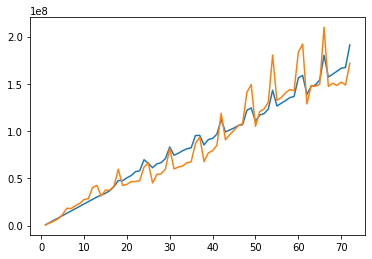

In [ ]:
temp = np.arange(1,73).reshape(72,1)
X_new = temp
temp2 = np.hstack( (np.ones((72,1)),X_new ) )

pred_new = temp2.dot(theta).reshape(72,1)
# print(pred_new.shape)
for i in range(60):
  pred_new[12+i] = pred_new[12+i] - (diff_2_mean[i])

print("RMSE : ", np.sqrt( (np.sum((pred_new-np.array(df_comp))**2))/72) )

plt.plot(np.arange(1,73),pred_new)
plt.plot(np.arange(1,73),np.array(df_comp))
# print(np.array(df_comp))

Weighted Mean

In [ ]:
diff_2_mean_weighted = []
sum = 0;
# pred_l = pred_l.reshape((pred_l.shape[0],1))
temp = np.array(df_comp[0:60]).reshape((60,1))

for k in range(1,6):
  for i in range(12):
    mul = 1
    denom = 0;
    for j in range(k):
      denom += mul
      sum += mul*(pred[i + j*12] - df_comp[i + j*12])
      mul -= 0.2

    diff_2_mean_weighted.append(sum/denom)
    sum = 0

print(diff_2_mean_weighted)
print(len(diff_2_mean_weighted))

[array([31058.76164476]), array([463578.13780196]), array([917471.91395917]), array([726709.79011637]), array([-1118388.7337264]), array([-5272297.15756946]), array([-2544355.88141239]), array([-3094585.70525531]), array([-3047188.62909819]), array([-4722099.65294106]), array([-3219653.976784]), array([-12449234.20062692]), array([-5481221.23218402]), array([878064.14397314]), array([-489656.56875861]), array([448572.95184301]), array([-1369916.99422203]), array([-10559841.46250945]), array([-306919.9196856]), array([-5622.4101952]), array([-182163.33403803]), array([-80832.71343651]), array([1412325.31827619]), array([-8984156.72778892]), array([-5745284.30178408]), array([4918377.24937307]), array([2260069.83386352]), array([3395385.66835406]), array([1378133.57784456]), array([-10324402.72932893]), array([3392818.34682542]), array([3744533.17298252]), array([3942218.49913967]), array([3746846.58363013]), array([5267667.65145459]), array([-6780450.96405234]), array([-5556924.37248415

RMSE :  620951262.9943744


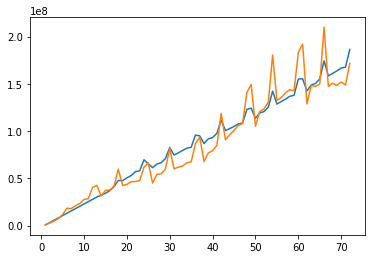

In [ ]:
X_new = np.arange(1,73).reshape(72,1)
temp2 = np.hstack( (np.ones((72,1)),X_new ) )

pred_new = temp2.dot(theta).reshape(72,1)
# print(pred_new.shape)
for i in range(60):
  pred_new[12+i] = pred_new[12+i] - (diff_2_mean_weighted[i])

print("RMSE : ", np.sqrt( (np.sum((pred_new-np.array(df_comp))**2))/72) )

plt.plot(np.arange(1,73),pred_new)
plt.plot(np.arange(1,73),np.array(df_comp))
# print(np.array(df_comp))

Weighted Mean with starting values with higher Weightage

In [ ]:
diff_2_mean_weighted2 = []
sum = 0;
# pred_l = pred_l.reshape((pred_l.shape[0],1))
temp = np.array(df_comp[0:60]).reshape((60,1))

for k in range(1,6):
  for i in range(12):
    mul = 0.2
    denom = 0;
    for j in range(k):
      denom += mul
      sum += mul*(pred[i + j*12]-df_comp[i + j*12])
      mul += 0.2

    diff_2_mean_weighted2.append(sum/denom)
    sum = 0

print(diff_2_mean_weighted2)
print(len(diff_2_mean_weighted2))
# print(np.hstack((pred_l,temp)))

[array([31058.76164476]), array([463578.13780196]), array([917471.91395917]), array([726709.79011637]), array([-1118388.7337264]), array([-5272297.15756946]), array([-2544355.88141239]), array([-3094585.70525531]), array([-3047188.62909819]), array([-4722099.65294106]), array([-3219653.976784]), array([-12449234.20062692]), array([-8237361.22909841]), array([1085307.14705873]), array([-1193220.8101175]), array([309504.53270632]), array([-1495681.12446984]), array([-13203613.61497944]), array([811798.06117779]), array([1538859.23733486]), array([1250349.31349205]), array([2239800.75631576]), array([3728314.96580629]), array([-7251617.99136992]), array([-7387417.36984133]), array([9062311.8563158]), array([4658014.1158062]), array([6272664.17529677]), array([4063302.08478723]), array([-11410850.07238342]), array([7651915.60376814]), array([8266929.57992527]), array([8782856.65608242]), array([8734842.61557291]), array([10281004.80839804]), array([-3710475.83210627]), array([-6203156.3405

RMSE :  620298312.2647784


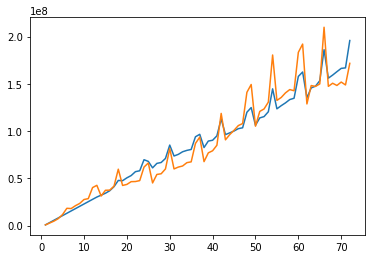

In [ ]:
X_new = np.arange(1,73).reshape(72,1)
temp2 = np.hstack( (np.ones((72,1)),X_new ) )

pred_new = temp2.dot(theta).reshape(72,1)
# print(pred_new.shape)
for i in range(60):
  pred_new[12+i] = pred_new[12+i] - (diff_2_mean_weighted2[i])

print("RMSE : ", np.sqrt( (np.sum((pred_new-np.array(df_comp))**2))/72) )

plt.plot(np.arange(1,73),pred_new)
plt.plot(np.arange(1,73),np.array(df_comp))
# print(np.array(df_comp))

<h1>Part 3 : Seasonality Through ACF</h1>

In [ ]:
# plt.acorr(df_comp,maxlags=48)

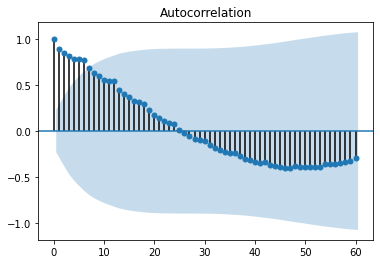

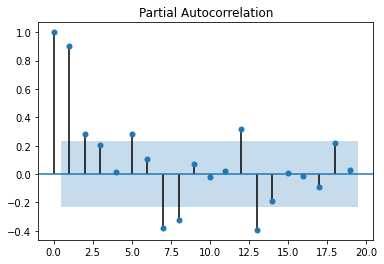

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

ACF = plot_acf(df_comp,lags=60)
PACf = plot_pacf(df_comp)


In [ ]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.26475064454048
p-value : 0.000510965604918347
Number of Lags Used : 11
Number of Observations Used : 57
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


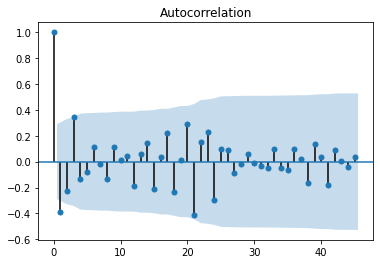

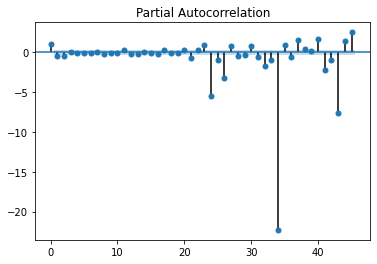

In [ ]:
df_diff = df_comp.diff()
df_diff_12 = df_diff.diff(12)
df_diff_24 = df_diff_12.diff(12)
df_diff_36 = df_diff_24.diff(12)


# print(df_diff_12)
# ACF = plot_acf(df_comp.dropna())
# ACF = plot_acf(df_diff.dropna())
# ACF = plot_acf(df_diff_12.dropna())
# ACF = plot_acf(df_diff_24.dropna(),lags=24)
# ACF = plot_acf(df_diff_36.dropna(),lags=24)

# df_diff_24.dropna().plot()
# df_diff_12.dropna().plot()
# adf_check(df_comp.dropna())
# adf_check(df_comp.diff().dropna())
adf_check(df_comp.diff().diff().diff().dropna())
# df_comp.diff().diff().dropna().plot()
# print(df_comp.diff().diff().dropna().size)
ACF = plot_acf(df_comp.diff().diff().diff(12).diff(12).dropna(),lags=45)
PACf = plot_pacf(df_comp.diff().diff().diff(12).diff(12).dropna(),lags=45)


# adf_check(df_comp.diff(12).dropna())
# adf_check(df_comp.diff(12).diff().dropna())
# adf_check(df_comp.diff(12).diff(12).dropna())
# adf_check(df_comp.diff(12).diff(12).diff(12).diff().dropna())


#Stationary one  : df_comp.diff(12).diff(12).diff(12).diff() , df_comp.diff().diff()


# adf_check(df_diff.dropna())
# adf_check(df_diff_12.dropna())
# adf_check(df_diff_24.dropna())
# adf_check(df_diff_36.dropna())
# print(df_diff_36.dropna().size)



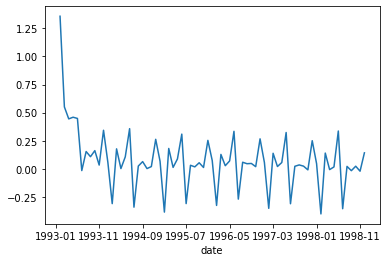

In [ ]:
df_log = np.log(df_comp)
# df_log.plot()
df_log.diff().plot()

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.9697363545213977
p-value : 0.7641416500288573
Number of Lags Used : 11
Number of Observations Used : 60
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.30132449053462024
p-value : 0.9774051716736597
Number of Lags Used : 4
Number of Observations Used : 55
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 



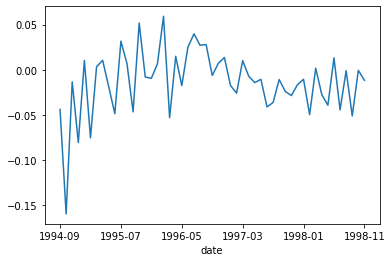

In [ ]:
(df_log.diff() - df_log.diff().shift(12))[20:-1].plot()
adf_check(df_log.dropna())
adf_check(df_log.diff(12).dropna())
# adf_check(df_log.diff(12).diff(12).dropna())


AR Model

In [ ]:
def AR(p,df):
  df = df.dropna()
  y = np.array(df.shift(p))
  y = np.nan_to_num(y)
  y = y.reshape(y.shape[0],1)
  print(y)
  n = df.shape[0]
  num_variables = p
  theta = np.random.rand(num_variables+ 1,1)
  temp = np.array(df.shift(p))
  temp = np.nan_to_num(temp).reshape(temp.shape[0],1)
  zero = np.zeros((p,1))
  temp = np.concatenate((zero, temp))
  X = temp[0:p].reshape(1,p)
  # print(X.shape)
  for i in range(1,df.shape[0]):
    X = np.vstack((X,temp[i:i+p].reshape(1,p)))
  # print(X.shape)

  # [X,mean,sigma] = NormalizeData(X)

  X = np.hstack( (np.ones((y.shape[0],1)),X ))
  # # print(X)
  # print(y.shape,X.shape,theta.shape)

  # print(y,X)

  num_iters= 100000
  reg = 0.5
  learning_rate = 1e-16
  [theta,J_history] = gradientDescentWithMomentum(X,y,theta,num_iters,reg,learning_rate,True);
  # RMSE = 
  # print("RMSE : ", np.sqrt( (np.sum((pred_new-np.array(df_comp))**2))/72) )

  return [X,theta,J_history]

# theta = np.random.rand(num_features+1,1)
# print("Initial value of theta is : \n",theta)

In [ ]:
p = 12
[X_ar,theta,J_history] = AR(p,df_comp.diff().diff().dropna())

Streaming output truncated to the last 5000 lines.
Iteration  95001  :  [5.53493205e+12]
Iteration  95002  :  [5.53493104e+12]
Iteration  95003  :  [5.53493003e+12]
Iteration  95004  :  [5.53492902e+12]
Iteration  95005  :  [5.53492801e+12]
Iteration  95006  :  [5.53492699e+12]
Iteration  95007  :  [5.53492598e+12]
Iteration  95008  :  [5.53492497e+12]
Iteration  95009  :  [5.53492396e+12]
Iteration  95010  :  [5.53492295e+12]
Iteration  95011  :  [5.53492194e+12]
Iteration  95012  :  [5.53492093e+12]
Iteration  95013  :  [5.53491992e+12]
Iteration  95014  :  [5.53491891e+12]
Iteration  95015  :  [5.5349179e+12]
Iteration  95016  :  [5.53491689e+12]
Iteration  95017  :  [5.53491588e+12]
Iteration  95018  :  [5.53491486e+12]
Iteration  95019  :  [5.53491385e+12]
Iteration  95020  :  [5.53491284e+12]
Iteration  95021  :  [5.53491183e+12]
Iteration  95022  :  [5.53491082e+12]
Iteration  95023  :  [5.53490981e+12]
Iteration  95024  :  [5.5349088e+12]
Iteration  95025  :  [5.53490779e+12]
I

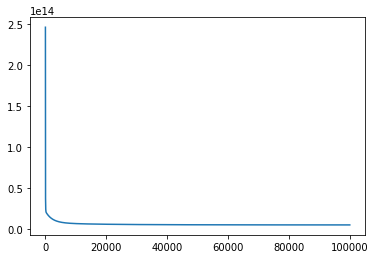

In [ ]:
plt.plot(J_history)

In [ ]:
print(theta)

[[ 0.88188875]
 [-0.05922262]
 [-0.91346051]
 [-0.3608561 ]
 [-0.00546184]
 [ 0.09777539]
 [-0.03159593]
 [-0.39454906]
 [-0.83646048]
 [-1.26105532]
 [-1.49737653]
 [-1.55944687]
 [-1.37004847]]


(70, 1)


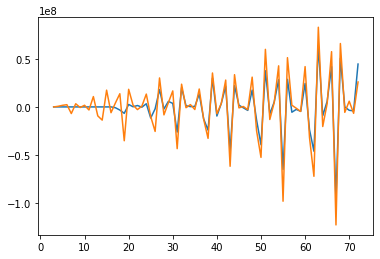

In [ ]:
# X = np.array(df[1:p+1]).reshape(1,p)
pred = X_ar.dot(theta)
print(pred.shape)
plt.plot(np.arange(3,73),pred)
plt.plot(np.arange(3,73),np.array(df_comp.diff().diff().dropna()))
# print(pred)

In [ ]:
temp = df_comp.diff().diff()
temp += df_comp.shift(1)
temp += df_comp.diff(1).shift(1)
# temp.plot()
# df_comp.diff().diff().shift(12).plot()

(70, 1)


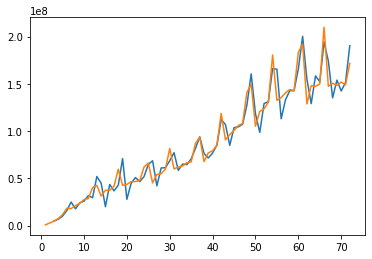

In [ ]:
temp = np.zeros(df_comp.shape)
temp += df_comp.shift(1)
temp += df_comp.diff(1).shift(1)
temp = temp.dropna()
temp = np.array(temp)
temp = temp.reshape(temp.shape[0],1)
temp += pred

print(pred.shape)
plt.plot(np.arange(3,73),temp)
plt.plot(np.arange(1,73),np.array(df_comp))

In [ ]:
pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.11.1)


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df_comp.diff().diff().dropna(), lags=12)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept    -593157.701726
amount.L1         -1.322182
amount.L2         -1.548130
amount.L3         -1.555605
amount.L4         -1.414333
amount.L5         -1.014689
amount.L6         -0.625043
amount.L7         -0.230279
amount.L8         -0.059155
amount.L9         -0.052237
amount.L10        -0.247538
amount.L11        -0.706608
amount.L12         0.044172
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


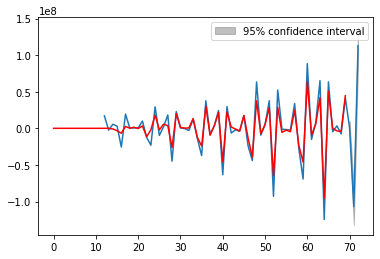

In [ ]:
from sklearn.metrics import mean_squared_error
model_fit.plot_predict(start=0, end=len(df_comp-2))
# plt.plot(np.array(df_comp))
plt.plot(np.arange(0,70),pred,color="red")
plt.show()